# Data Loading
This section loads the necessary libraries and the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0


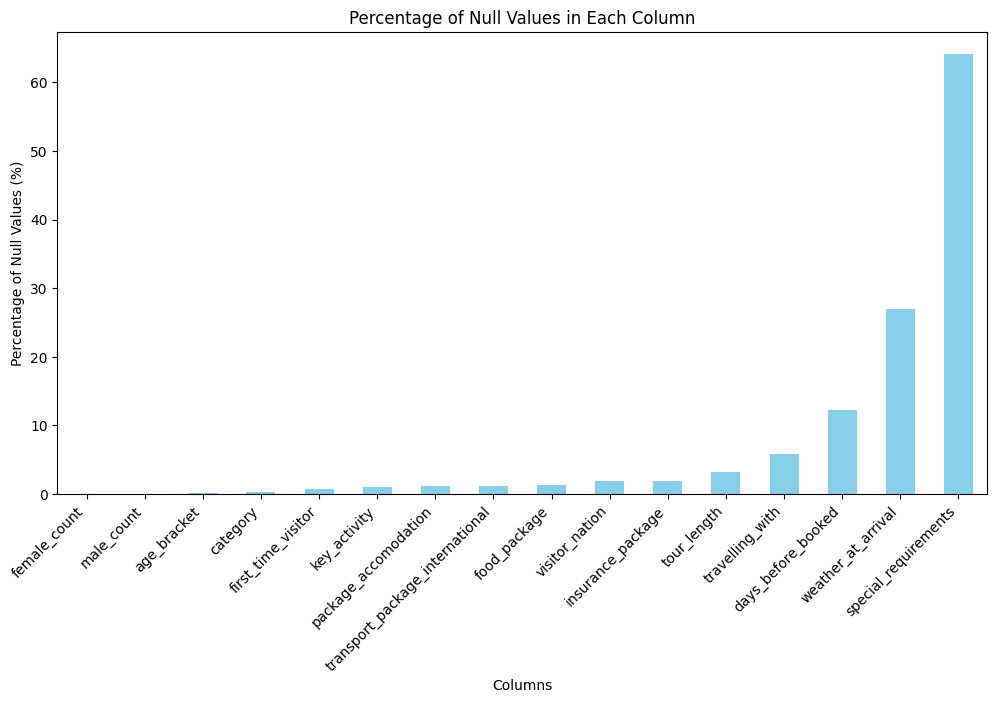

In [ ]:
null_percent = df.isnull().mean() * 100  # Calculate the percentage of null values
null_percent = null_percent[null_percent > 0]  # Filter only columns with null values

# Plotting
plt.figure(figsize=(12, 6))
null_percent.sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(12654, 25)

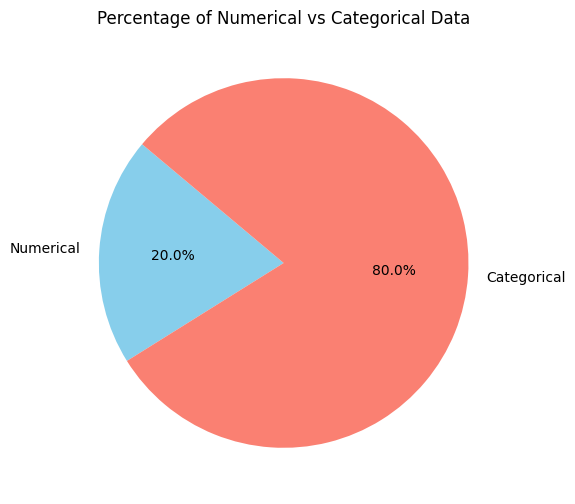

In [ ]:
num_cols = df.select_dtypes(include=['number']).shape[1]
cat_cols = df.select_dtypes(include=['object', 'category']).shape[1]

# Calculate the percentage
total_cols = df.shape[1]
percentages = [num_cols / total_cols * 100, cat_cols / total_cols * 100]
labels = ['Numerical', 'Categorical']

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Percentage of Numerical vs Categorical Data')
plt.show()

In [ ]:
df['special_requirements'].fillna('None', inplace=True)

<ipython-input-88-af1c8b6607d6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['special_requirements'].fillna('None', inplace=True)


In [ ]:
mode_age_bracket = df['age_bracket'].mode()[0]
df['age_bracket'].fillna(mode_age_bracket, inplace=True)

<ipython-input-89-2f905c86ec6b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_bracket'].fillna(mode_age_bracket, inplace=True)


In [ ]:
mode_age_bracket = df['first_time_visitor'].mode()[0]
df['first_time_visitor'].fillna(mode_age_bracket, inplace=True)

<ipython-input-90-0a87ced0a0be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_time_visitor'].fillna(mode_age_bracket, inplace=True)


# Data Preprocessing
Steps to clean and preprocess the data for analysis and modeling.

In [ ]:
mode_age_bracket = df['key_activity'].mode()[0]
df['key_activity'].fillna(mode_age_bracket, inplace=True)

<ipython-input-91-feb71e48a6df>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key_activity'].fillna(mode_age_bracket, inplace=True)


In [ ]:
df['travelling_with'].fillna('Not Specified', inplace=True)
df['visitor_nation'].fillna('Unknown', inplace=True)

<ipython-input-92-c1f16ce368ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['travelling_with'].fillna('Not Specified', inplace=True)
<ipython-input-92-c1f16ce368ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
df['days_before_booked'].fillna('Unknown', inplace=True)

<ipython-input-93-af6c1ec029f0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_before_booked'].fillna('Unknown', inplace=True)


In [ ]:
df['total_group_size'] = df['female_count'] + df['male_count']
df['total_nights'] = df['mainland_nights'] + df['island_nights']


In [ ]:
# Define a function to fill NaNs with the mode of each group
def fill_with_group_mode(group):
    mode_value = group['weather_at_arrival'].mode()
    if not mode_value.empty:
        group['weather_at_arrival'].fillna(mode_value[0], inplace=True)
    return group

# Apply the function to each group of visitor_nation
df = df.groupby('visitor_nation').apply(fill_with_group_mode)

<ipython-input-95-82cf2a72767d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  group['weather_at_arrival'].fillna(mode_value[0], inplace=True)
<ipython-input-95-82cf2a72767d>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.gro

In [ ]:
df.isnull().sum()

,0
trip_ID,0
visitor_nation,0
age_bracket,0
travelling_with,0
female_count,2
male_count,4
key_activity,0
trip_purpose,0
first_time_visitor,0
mainland_nights,0


<Axes: xlabel='age_bracket', ylabel='count'>

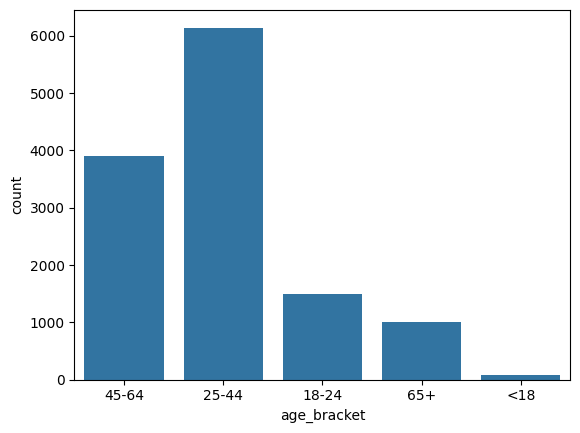

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='age_bracket')

In [ ]:
df.shape

(12654, 27)

In [ ]:
np.array(df['days_before_booked'])

array(['61-90', '8-14', '90+', ..., '61-90', '61-90', '90+'], dtype=object)

# Exploratory Data Analysis (EDA)
Initial exploration of the dataset to identify patterns and insights.

In [ ]:
df = df.drop(columns=['trip_ID'], inplace=False)

In [ ]:
df = df.dropna(subset=['travelling_with'], inplace=False)

In [ ]:
df = df.dropna(subset=['category'])

In [ ]:
df = df.dropna(subset=['tour_length'])
df = df.dropna(subset=['insurance_package'])
df = df.dropna(subset=['food_package'])

In [ ]:
df = df.dropna(subset=['female_count'])
df = df.dropna(subset=['male_count'])
df = df.dropna(subset=['transport_package_international'])
df = df.dropna(subset=['package_accomodation'])

In [ ]:
df = df.dropna(subset=['weather_at_arrival'])

In [ ]:
df = df.drop(columns=['female_count'], inplace=False)
df = df.drop(columns=['male_count'], inplace=False)

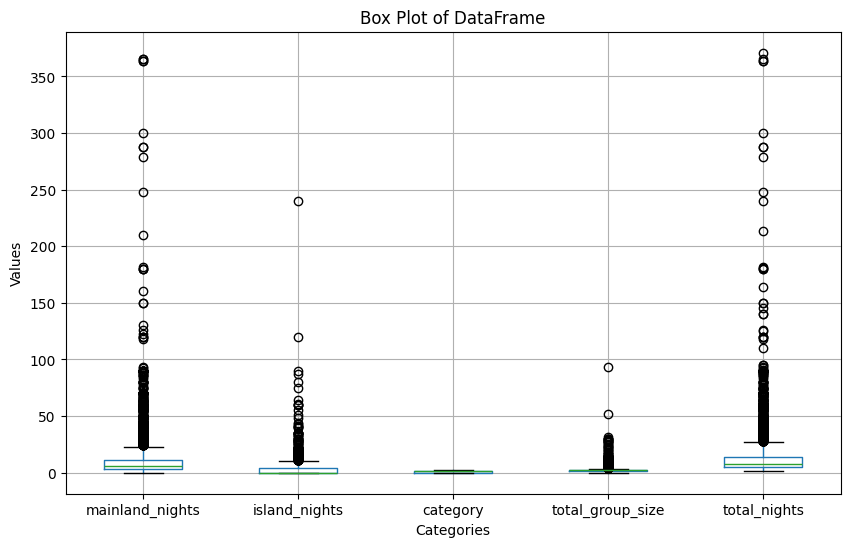

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot of DataFrame')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

# Model Training
Implementation of machine learning models to predict outcomes.

In [ ]:
# df.info()
print(df.describe())
# print(df.describe(include='object'))

       mainland_nights  island_nights      category  total_group_size  \
count     11539.000000   11539.000000  11539.000000      11539.000000   
mean          9.236849       2.509230      0.623104          1.946096   
std          14.825675       5.148646      0.685251          2.026871   
min           0.000000       0.000000      0.000000          0.000000   
25%           3.000000       0.000000      0.000000          1.000000   
50%           6.000000       0.000000      1.000000          2.000000   
75%          11.000000       4.000000      1.000000          2.000000   
max         365.000000     240.000000      2.000000         93.000000   

       total_nights  
count  11539.000000  
mean      11.746079  
std       15.202533  
min        1.000000  
25%        5.000000  
50%        8.000000  
75%       14.000000  
max      371.000000  


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Normalize the data (excluding the target column)
# X = df.drop(columns=['category'])
# X_scaled = scaler.fit_transform(X)

# # Convert back to a DataFrame
# X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# # Combine the normalized features with the target column
# df_normalized = pd.concat([X_normalized, df['category']], axis=1)


In [ ]:
df.shape

(11539, 24)

In [ ]:
# Step 1: Encode categorical columns using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

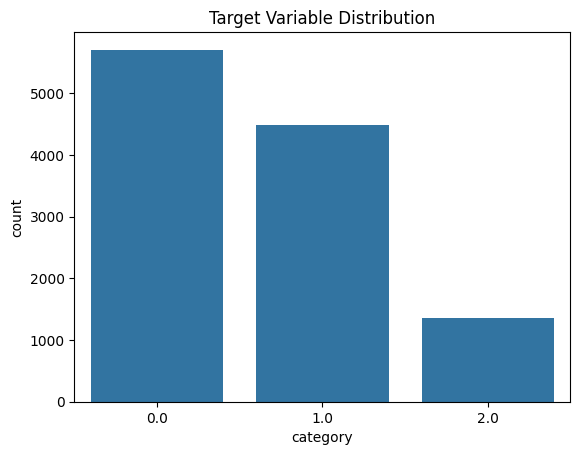

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (assuming 'category' is the target column)
sns.countplot(x='category', data=df)
plt.title("Target Variable Distribution")
plt.show()


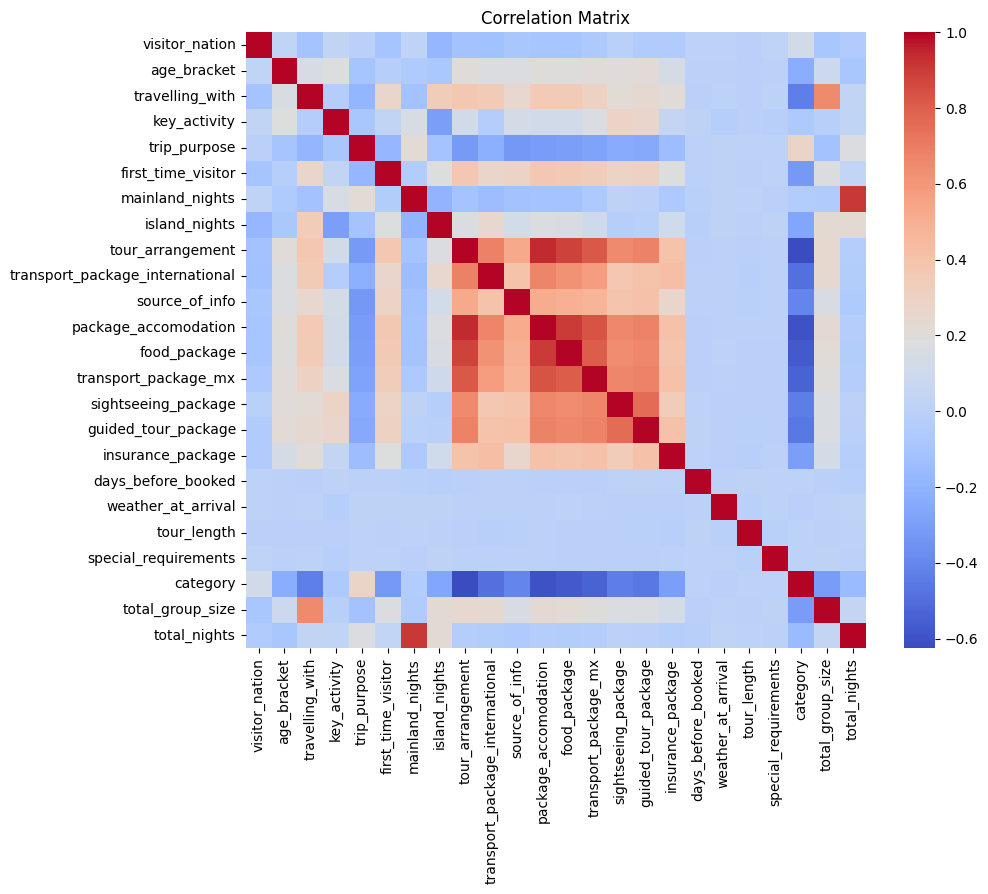

In [ ]:
import seaborn as sns


# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import numpy as np

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, columns):
    for column in columns:
        if np.issubdtype(df[column].dtype, np.number):  # Check if the column is numerical
            Q1 = df[column].quantile(0.20)
            Q3 = df[column].quantile(0.95)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from all numerical columns in the DataFrame
df = remove_outliers_iqr(df, df.columns)


In [ ]:
from sklearn.model_selection import train_test_split


# Step 2: Prepare the feature matrix (X) and target vector (y)
X = df.drop(columns=['category'])  # Assuming 'category' is the target column
y = df['category']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Step 4: Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:47:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.76


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Step 4: Set up the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Step 5: Define the hyperparameters grid
param_grid = {
    'n_estimators': [150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.6, 0.8, 1.0]
}

# Step 6: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Step 7: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 8: Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 9: Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:29:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.7659505417965914
Test Set Accuracy: 0.77


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


# Step 4: Set up the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 5: Define the hyperparameters grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'bootstrap': [True, False]
}

# Step 6: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Step 7: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 8: Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 9: Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.7582527509169723
Test Set Accuracy: 0.75


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Step 4: Train the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the AdaBoost model
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"AdaBoost Model Accuracy: {accuracy_ada:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Accuracy: 0.75


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 4: Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.2f}")


Gradient Boosting Model Accuracy: 0.76


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, VotingRegressor, VotingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, XGBClassifier

def apply_ensemble_model(df, target_column, is_classification=True, test_size=0.2, random_state=42):
    """
    Applies an ensemble model using Gradient Boosting and XGBoost on a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column.
    is_classification (bool): Whether the problem is classification or regression (default is classification).
    test_size (float): The proportion of the dataset to include in the test split (default is 0.2).
    random_state (int): The seed used by the random number generator.

    Returns:
    ensemble_model: The trained ensemble model.
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Label encode categorical features
    X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define individual models
    if is_classification:
        model1 = GradientBoostingClassifier(random_state=random_state)
        model2 = XGBClassifier(random_state=random_state, use_label_encoder=False, eval_metric='mlogloss')
        ensemble_model = VotingClassifier(estimators=[('gb', model1), ('xgb', model2)], voting='soft')
    else:
        model1 = GradientBoostingRegressor(random_state=random_state)
        model2 = XGBRegressor(random_state=random_state)
        ensemble_model = VotingRegressor(estimators=[('gb', model1), ('xgb', model2)])

    # Fit the ensemble model
    ensemble_model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = ensemble_model.predict(X_test)
    if is_classification:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Ensemble Model Accuracy: {accuracy:.4f}")
    else:
        mse = mean_squared_error(y_test, y_pred)
        print(f"Ensemble Model Mean Squared Error: {mse:.4f}")

    return ensemble_model

# Example usage
# Assuming 'df' is your DataFrame and 'category' is the target column
ensemble_model = apply_ensemble_model(df, target_column='category', is_classification=True)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.7631


In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements
0,tour_id8gzpck76,CONGO,25-44,Alone,0.0,1.0,Widlife Tourism,Business,No,14,...,No,No,No,No,No,No,15-30,"sunny,",15-30,"wheelchair,"
1,tour_idow1zxkou,SWIZERLAND,45-64,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,8,...,Yes,Yes,No,No,Yes,No,61-90,Stormy,1-6,NaN
2,tour_idue7esfqz,MEXICO,45-64,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Leisure and Holidays,Yes,3,...,Yes,Yes,Yes,Yes,Yes,No,1-7,Stormy,30+,none
3,tour_idnj3mjzpb,JAPAN,25-44,With Other Friends/Relatives,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,5,...,Yes,Yes,Yes,Yes,Yes,No,90+,"sunny,",7-14,NaN
4,tour_ida3us5yk2,SPAIN,25-44,With Other Friends/Relatives,2.0,0.0,Wildlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,No,Yes,No,Yes,61-90,Stormy,30+,"dietary needs,"


In [ ]:
df_test['total_group_size'] = df_test['female_count'] + df_test['male_count']
df_test['total_nights'] = df_test['mainland_nights'] + df_test['island_nights']


In [ ]:
df_test = df_test.drop(columns=['female_count'], inplace=False)
df_test = df_test.drop(columns=['male_count'], inplace=False)

# Model Evaluation
Assessing the model's performance and calculating metrics such as accuracy.

**Accuracy of the model:** _To be updated_.

In [ ]:
df_test1 = df_test.drop(columns=['trip_ID'], inplace=False)

In [ ]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   5726 non-null   object 
 1   age_bracket                      5852 non-null   object 
 2   travelling_with                  5514 non-null   object 
 3   key_activity                     5787 non-null   object 
 4   trip_purpose                     5852 non-null   object 
 5   first_time_visitor               5813 non-null   object 
 6   mainland_nights                  5852 non-null   int64  
 7   island_nights                    5852 non-null   int64  
 8   tour_arrangement                 5852 non-null   object 
 9   transport_package_international  5795 non-null   object 
 10  source_of_info                   5852 non-null   object 
 11  package_accomodation             5790 non-null   object 
 12  food_package        

In [ ]:
df_test1.isnull().sum()

,0
visitor_nation,126
age_bracket,0
travelling_with,338
key_activity,65
trip_purpose,0
first_time_visitor,39
mainland_nights,0
island_nights,0
tour_arrangement,0
transport_package_international,57


In [ ]:
df_test1['total_group_size'].fillna('Unknown', inplace=True)

In [ ]:
label_encoders = {}
for column in df_test1.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_test1[column] = le.fit_transform(df_test1[column].astype(str))
    label_encoders[column] = le

In [ ]:
y_pred = rf_model.predict(df_test1)

In [ ]:
y_pred = best_model.predict(df_test1)

In [ ]:
y_pred = xgb_model.predict(df_test1)

In [ ]:
y_pred = best_model.predict(df_test1)

In [ ]:
y_pred = ada_model.predict(df_test1)

In [ ]:
y_pred = gb_model.predict(df_test1)

In [ ]:
y_pred = ensemble_model.predict(df_test1)

In [ ]:
y_pred

array([1., 0., 0., ..., 0., 2., 1.])

In [ ]:
results_df = pd.DataFrame({
    'trip_ID': df_test['trip_ID'],
    'Predicted_Category': y_pred
})

# Convert to CSV
results_csv_path = '/content/predictions.csv'
results_df.to_csv(results_csv_path, index=False)

print(f"CSV file saved at {results_csv_path}")

CSV file saved at /content/predictions.csv


## Conclusion
(The accuray are of kaggle submitions.)
- **XGBoost** gives an accuracy of **67.08%**.
- **Random Forest** gives an accuracy of **65.160%**.
- **AdaBoost** gives an accuracy of **64.77%**.
- **Gradient Boosting** gives an accuracy of **65.38%**.
